In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1

Зачем нужны A/A эксперименты?

- Оценить на пользователях эффект от внедрения новой фичи
- [+] Оценить корректность применения статистических критериев
- Оценить эффект на пользователях без проведения A/B эксперимента
- [+] Проверить систему сплитования

**Комментарий**

A/A эксперименты проводятся на историческом наборе данных, вторая буква A как раз символизирует, что изменений между группами нет. Нужно для проверки системы для тестирования, в том числе системы сплитования и корректности применнения статистических критериев.

### 2

В чём заключается A/A эксперимент?

- Повторный расчёт метрик после окончания A/B эксперимента
- [+] Многократная симуляция A/B эксперимента с разным разбиением пользователей
- Использование данных неуспешного эксперимента для проверки системы аналитики
- Тестовое проведение A/B эксперимента для проверки системы аналитики

### 3

Выберите верное утверждение про A/A эксперимент:

- [+] В A/A эксперименте все измерения делаются в предположении нулевой гипотезы
- В A/A эксперименте никак не учитывается нулевая и альтернативная гипотезы
- В A/A эксперименте все измерения делаются в предположении альтернативной гипотезы

**Комментарий**

Так как это A/A и группы не отличаются, то логично действовать в предположении нулевой гипотезы, так как она и должна быть верна.

### 4

Какой основной критерий проверяется в A/A эксперименте?

- Доля ложноположительных ошибок должна быть близка к нулю, так как верна нулевая гипотеза
- Доля ложноотрицательных ошибок должна быть близка к нулю, так как верна альтернативная гипотеза
- [+] Доля ложноположительных ошибок должна совпадать с выбранным уровнем значимости, так как верна нулевая гипотеза
- Доля ложноположительных ошибок должна совпадать с выбранным уровнем значимости, так как верна альтернативная гипотеза

**Комментарий**

Суть A/B экспериментов в том, что ложноположительная ошибка не может быть нулевой, а фиксируется на некотором уровне. В A/A эксперименте мы как раз действуем в предположении, что группы не разливаются, то есть верна нулевая гипотеза.

### 5

В процессе симуляции A/A экспериментов мы собираем значения p-value. Какое у них должно быть распределение?

- [+] Равномерное
- Распределение с пиком около нуля
- Нормальное
- Любое из перечисленных

**Комментарий**

На уроках мы пробовали проводить A/A на синтетических данных и получали равномерное распределение. Доказать это сложнее, p-value похож на функцию распределения и квантили, где получается такое же свойство.

### 6

Одно из условий применимости t-критерия Стьюдента — нормальность исходных данных (хотя на деле тест всё же устойчив к отклонениям).

Но давайте проверим, сломается ли что-то, если мы будем подавать в t-критерий Стьюдента данные не из нормального распределения.

Представим, что мы хотим сравнить скрипты, по котором обзваниваем наших клиентов с предложением о новой услуге. В результате клиенты либо соглашаются, либо нет. Хотим оценить, лучше ли новый скрипт, чем старый.

Для этого реализуйте функцию, которая будет генерировать две выборки одного размера из распределения Бернулли (пусть количество клиентов в группе равно 1000, а вероятность для генерации равна 0.2), оценивать с помощью t-критерия Стьюдента p-value для гипотезы о равенстве средних.

С помощью этой функции просимулируйте 1000-10000 раз A/A тест и посмотрите на распределение p-value. Также можно оценить долю ложноположительных ошибок. Можете ли вы сказать, что из-за неправильного применения t-критерия Стьюдента сломалась процедура A/B тестирования?

Для генерации выборки из распределения Бернулли можно пользоваться биномиальным распределением.

In [2]:
from scipy.stats import mannwhitneyu, ttest_ind

users_num = 1000

def get_pvalue(): 
    clicks_1 = np.random.binomial(n=1, p=0.2, size=users_num)
    clicks_2 = np.random.binomial(n=1, p=0.2, size=users_num)

    return ttest_ind(clicks_1, clicks_2)[1]

In [3]:
pvalues = [get_pvalue() for _ in range(10000)]

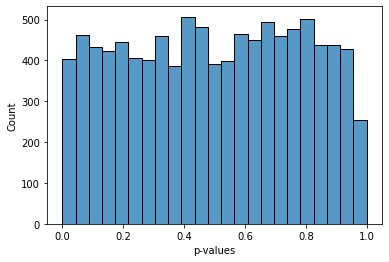

In [4]:
sns.histplot(pvalues)
plt.xlabel('p-values')
plt.show()

In [5]:
np.mean(np.array(pvalues) < 0.05)

0.0479

Как можно увидеть, распределение похоже на равномерное и доля ложноположительных ошибок совпадает с уровнем значимости.

Таким образом, нет, процедура не сломалась, так как доля ложноположительных ошибок примерно равна выбранному уровню значимости.

### 7

От чего зависит мощность статистического критерия в A/B эксперименте?

- [+] Размер эффекта
- [+] Количество наблюдений
- [+] Дисперсия метрики
- [+] Выбор статистического критерия

**Комментарий**

Все из этих величин влияют на мощность.

### 8

Предположим, что мы определяемся с сетапом проведения A/B эксперимента. Во сколько раз нам надо увеличить нашу выборку, чтобы уменьшить минимальный детектируемый эффект в 3 раза?

Ориентируйтесь на формулу из лекции. Заметим, что размер выборки в ней — количество наблюдений в каждой из групп (предполагается, что выборки одинакового размера).

**Решение**

Если вспомнить формулу, то размер выборки там входит с квадратичным корнем (как и в длину доверительного интервала). Поэтому выборку надо увеличить в 9 раз.

### 9

Оцените минимальный размер выборки по формуле из лекции, если мы хотим иметь ошибку первого рода, равную 5%, мощность 90%, дисперсия нашей метрики равна 10, а эффект, который мы хотели бы детектировать, равен 0.5.

При использовании формулы вы заметите, что для вычисления вам уже нужно знать размер выборки (как число степеней свободы распределения Стьюдента), однако от этого значения не зависит порядок вычисленного числа, поэтому можете попробовать подставить разные значения (в том числе ближе к тому, которое вы в итоге будете получать). Число какого порядка вы получили? Заметим, что это размер одной из групп при условии, что группы в нашем эксперименте одинакового размера.

In [1]:
from scipy.stats import t

N = 1000

2 * (t(N).ppf(1-0.05/2) + t(N).ppf(0.9)) ** 2 * (10 / 0.5 ** 2)

842.2658724473943

То есть ближе к 1000.

### 10

В чём идея оценки мощности вашей системы A/B тестирования через A/A тесты?

- [+] Мы многократно разбиваем пользователей и симулируем известный для нас эффект в эксперименте и оцениваем мощность
- Мы используем данные о прошедшем успешном A/B эксперименте, чтобы оценить мощность
- Мы многократно разбиваем пользователей с учётом значения метрик так, чтобы достигался нужный эффект, и оцениваем мощность

**Комментарий**

Основной способ оценить мощность — моделировать изменения в метркиах и оценивать, в какой доле случаев мы задетектируем изменение в метрике.

### 11

А теперь давайте попробуем оценить мощность с помощью симуляций, похожих на A/A эксперименты.

Предположим, что мы оцениваем, сколько времени пользователи проводят при изучении нашего рекламного предложения (сколько времени проходит от открытия до закрытия веб-страницы). До запуска эксперимента мы бы хотели понимать, какую мощность нам стоит ожидать, если мы будем запускать эксперимент на неделю.

Для этого аналогично процедуре проверки системы экспериментирования в A/A экспериментах реализуйте функцию, где будете генерировать две выборки из нормального распределения (предполагаем, что время распределено нормально со средним в контрольной группе 200 секунд и среднеквадратичным отклонением 30) одинакового размера (у нас 1000 пользователей в неделю, мы разбиваем их на 2 группы).

Повторите процедуру «эксперимента» 1000-10000 раз, оцените, в каком проценте случаев мы будем детектировать изменение в метрике, если в тестовой группе среднее будет равно 205 секунд. Это и будет мощностью в нашем эксперименте. В качестве статистического критерия используйте t-критерий Стьюдента, альтернатива двусторонняя, уровень значимости 0.05.

In [7]:
from scipy.stats import ttest_ind

users_num = 1000 // 2

In [8]:
def get_pvalue(): 
    time_1 = np.random.normal(loc=200, scale=30, size=users_num)
    time_2 = np.random.normal(loc=205, scale=30, size=users_num)

    return ttest_ind(time_1, time_2)[1]

In [9]:
pvalues = [get_pvalue() for _ in range(10000)]

In [10]:
np.mean(np.array(pvalues) < 0.05)

0.7533

Близко к 76%